- 학습 : 특성 데이터(원인)와 라벨 데이터(결과) 간의 관계성을 수식이나 규칙성으로 찾는 것


- 논리
    - and : 논리곱
    - or : 논리합
    - exclusive or : 논리합(mode 2)

# 1. 머신러닝 학습 방법
 - 거리 기반 학습
 - 수식 기반 학습
 - 논리 기반 학습
 - 확률 기반 학습 (Naive Bayes, 나이브 베이즈) : 겐

## 1.1  거리 기반 학습으로 AND 논리를 학습하는 모델을 만들자

- KNN, SVM

In [1]:
# AND 논리 선언
# [특성1, 특성2, 라벨(결과값)]
data_and = [[0, 0, 0], 
        [0, 1, 0], 
        [1, 0, 0],
        [1, 1, 1]]

# OR 논리 선언
data_or = [[0, 0, 0], 
        [0, 1, 1], 
        [1, 0, 1],
        [1, 1, 1]]

# EXCLUSIVE OR 논리 선언
data_ex_or = [[0, 0, 0], 
        [0, 1, 1], 
        [1, 0, 1],
        [1, 1, 0]]

In [2]:
# 입력 된 데이터 (x1, x2)에서 가장 가까운 데이터의 라벨을 출력
def distanceML(x1, x2, data) :
    # 최종 결과값
    result = 0
    # 최소 거리를 비교하기 위한 값
    minDis = 99
    
    # 전체 데이터에서 한 행씩 데이터를 가져온다.
    for row in data :
        # 특성 데이터와 라벨 데이터를 분리
        x = row[:-1]
        y = row[-1]
        
        #print(x, y)
        
        # 입력된 데이터 (x1, x2)와 각 특성 데이터 간의 거리 계산
        # abs : 절대값을 계산 (음수를 업애기 위해서, Why? 거리는 음수가 없기 때문)
        # 실제로는 제곱하는 방법인 유클리디안 거리를 많이 사용
        dis = abs(x1 - x[0]) + abs(x2 - x[1])
        
        # 거리가 최소인 데이터를 검색
        if dis < minDis :
            minDis = dis
            result = y
    
    # 거리가 가장 작은 데이터의 라벨값을 반환
    return result

In [3]:
print(distanceML(0, 0, data_and))
print(distanceML(0, 1, data_and))
print(distanceML(1, 0, data_and))
print(distanceML(1, 1, data_and))

0
0
0
1


In [4]:
# 특성1: 키 , 특성2: 몸무게 / 라벨: 비만도 데이터
data_biman = [
    [150, 40, '저체중'],
    [200, 100, '비만'],
    [180, 150, '비만'],
    [160, 40, '저체중'],
    [170, 70, '정상']
]

In [8]:
print(distanceML(160, 65, data_biman))
# 가중치를 부여하지 않으면 각 특성이 라벨에 미치는 영향을 정확히 적용할 수 없다.
# 각 특성의 거리에 가중치만큼 값을 곱해서 거리를 더하면 가중치를 적용할 수 있다.

정상


# 1.2 수식 기반 학습으로 AND 논리를 학습하는 모델을 만들자.

- Linear Regression(선형회귀), Ridge, Lasso
- Logistic Regression

In [11]:
# AND 논리 선언
# [특성1, 특성2, 라벨(결과값)]
data_and = [[0, 0, 0], 
        [0, 1, 0], 
        [1, 0, 0],
        [1, 1, 1]]

# OR 논리 선언
data_or = [[0, 0, 0], 
        [0, 1, 1], 
        [1, 0, 1],
        [1, 1, 1]]

# EXCLUSIVE OR 논리 선언
data_ex_or = [[0, 0, 0], 
        [0, 1, 1], 
        [1, 0, 1],
        [1, 1, 0]]

print(data_and)

[[0, 0, 0], [0, 1, 0], [1, 0, 0], [1, 1, 1]]


In [ ]:
# y = ax + b    a: 기울기(=가중치 W),  b: 절편
# AND = W1*A + W2*B + b (Wn : 가중치)
# 사람이라면 갖는 최소 기본값 bais를 더해줌
# 딥러닝에서 가중치와 bais를 구하는 공식(선형회귀에서 나옴)을 배울 수 있음

In [27]:
def mathematicalML(x1, x2, gubun) :
    if gubun == 'and':
        w1, w2, b = 0.3, 0.3, 0  # 여러분이 직접 맞춰보세요.(-1.0rhk 1.0 사이값을 넣어보세요.)
    elif gubun == 'or':
        w1, w2, b = 0.5, 0.5, 0.5
    elif gubun == 'exor':
        # 선형회귀로는 exor은 못구함
        pass
        
        
    # and 논리를 만드는 수식
    temp = w1 * x1 + w2 * x2 + b
    
    if temp <= 0.5 :
        return 0
    else :
        return 1

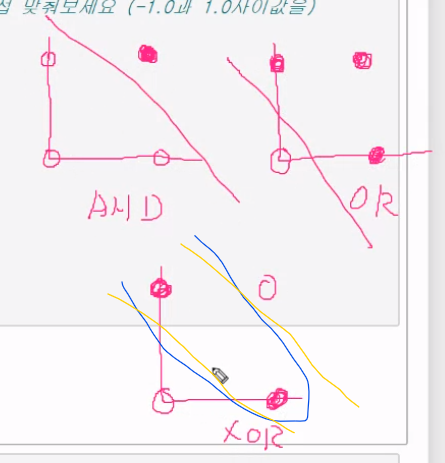
- exclusive or은 선 한개로 True, False가 안나뉨 (2차 방정식(제곱식)이나 선 2개를 써야 함)

In [28]:
print(andML(0, 0, 'and'))
print(andML(0, 1, 'and'))
print(andML(1, 0, 'and'))
print(andML(1, 1, 'and'))

0
0
0
1


In [ ]:
def andML(x1, x2, gubun) :
    if gubun == 'and':
        w1, w2, b = 0.3, 0.3, 0  # 여러분이 직접 맞춰보세요.(-1.0rhk 1.0 사이값을 넣어보세요.)
    elif gubun == 'or':
        w1, w2, b = 0.5, 0.5, 0.5
    elif gubun == 'exor':
        # 선형회귀로는 exor은 못구함
        pass
        
        
    # and 논리를 만드는 수식
    temp = w1 * x1 + w2 * x2 + b
    
    if temp <= 0.5 :
        return 0
    else :
        return 1

# 1.3 논리 기반 학습으로 AND 논리를 학습하는 모델을 만들자

- Decision Tree(의사결정)

In [18]:
def logicalML(x1, x2) :
    if x1 == 0 and x2 == 0 :
        return 0
    elif x1 == 0 and x2 == 1 :
        return 0
    elif x1 == 1 and x2 == 0 :
        return 0
    elif x1 == 1 and x2 == 1 :
        return 1
    
print(logicalML(0, 0))
print(logicalML(0, 1))
print(logicalML(1, 0))
print(logicalML(1, 1))

0
0
0
1


# 1.4 앙상블(Ensemble)

- Random Forest, Adaboost, GBM, Xgboost, LightGBM 등등
- 여러 개의 모델을 사용해서 투표나 확률을 계산하는 방식 : voting, stacking(현실에서는 별로 사용x, 경진대회용(0.2% 정도 올라감), ...
- 데이터를 쪼개서 사용하는 적용하는 방식 : bagging, boosting

- 모델을 사용하는 것보다 머신러닝에서는 데이터를 예쁘게 가공하는 전처리 과정이 아주 중요!!
    - numpy, pandas, matplolib 잘 사용하는 것이 중요

# 머신러닝 종류

- 지도 학습(Supervised Learning)
    - 데이터에 대한 Label(명시적인 답)이 주어진 상태에서 컴퓨터를 학습시키는 방법
    - 분류(Classification)와 회귀(Regression)로 나위어진다.
        - 분류 : 미리 정의된 여러 클래스 레이블 중 하나를 예측하는 것
            - 범주형 데이터에 사용
            - 정확도(accuracy)로 성능을 평가
            - 스팸 메일 분류
# .
        - 회귀 : 결과값을 연속적인 숫자로 예측하는 것 (수치 값의 대부분이 평균으로 돌아가기 때문에)
            - 수치 데이터에 사용
            - 오차(error)(= 실제 값 - 예측 값)로 성능을 평가 : 정확도로는  
            - 주식, 성적, 집값, ...
# .
            - 참고) 평균 : 평균 주위의 값에 대해서는 의미를 갖지만 평균에서 멀리 떨어진 값에는 무의미한 값이 된다는 문제점이 있음

- 비지도 학습 : 데이터에 대한 Label(명시적인 답)이 없는 상태에서 컴퓨터를 학습시키는 방법
    - 데이터 전처리와 가공에 많이 사용
    - 데이터의 숨겨진 특징, 구조, 패턴을 파악하는데 사용
    - 데이터를 비슷한 특성끼리 묶는 클러스터링(Clustering)과 차원 축소(Dimensionality Reduction) 등이 있다.
    - 왜 비지도 학습을 할까?
        - 현실에는 예측해야하는 데이터가 대부분, 라벨이 붙어있는 데이터는 거의 없다. 
        - 사람마다 달리는 라벨이 다를 수 있다.(사람이 라벨링을 하면 객관적이지 않을 수 있다. 컴퓨터에게 시키자.)
    - 차원 축소 : 양, 특성, 복잡도를 줄여주는 것
        - x^3 → 3*x^2 , (x, y, z) → (x, y) 
            - 분산이 줄어들고 밀집도가 높아져 정확도가 높아진다.
            - 투영시키는 것 (3차원의 물체가 가진 정보보다 3차원의 물체의 그림자(2차원)가 가진 정보가 훨씬 적다. )
        - 특성을 줄이는 것 : 너무 특성이 많아도 정확도가 떨어짐.
        - 1000page 책을 요약하는 것
        - 복잡하면 정확도가 떨어진다. >> 클래스 수, 특성 수, 차원 등을 줄인다.
        - GAN(적대적 생성 모델) : 확률 밀도 함수. 굉장히 많은 컴퓨터 자원과 시간을 소모
        - 이미지 감색 처리, 소비자 그룹 발견을 통한 마케팅, 손 글씨 숫자 인식
        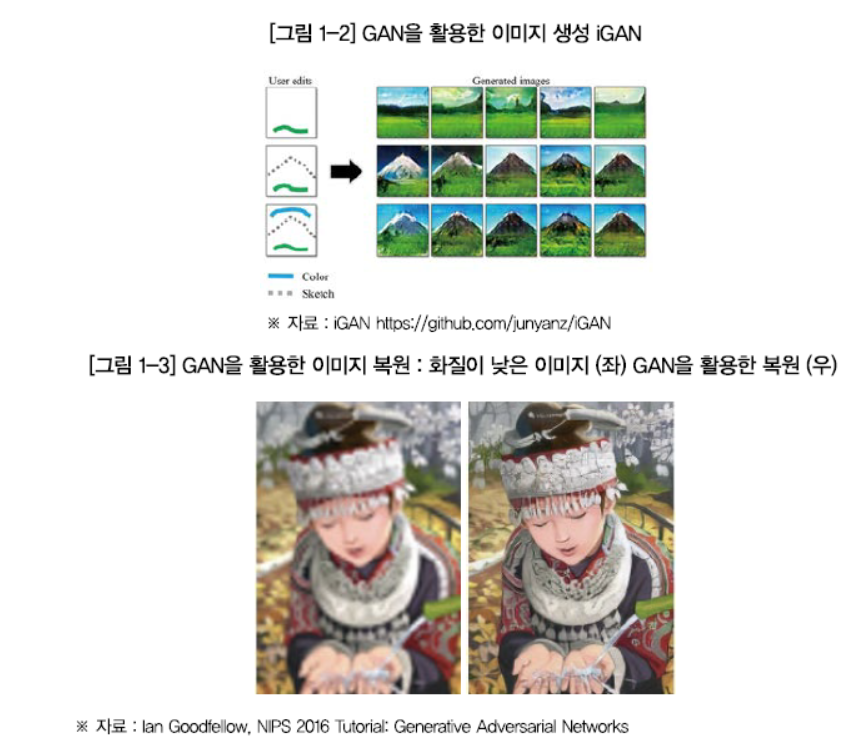
# .
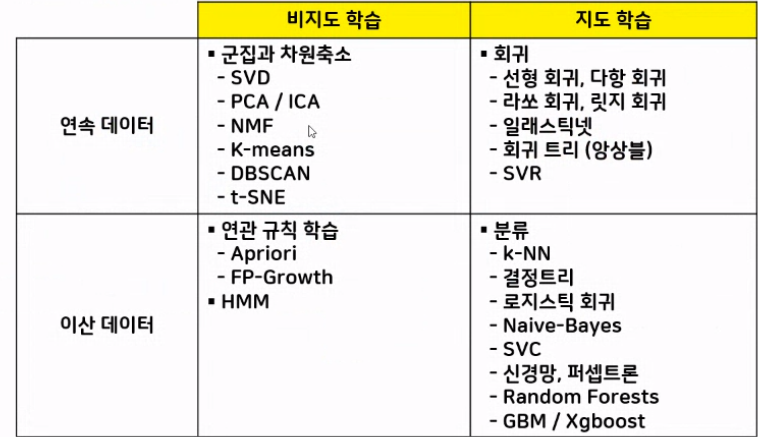
- 1. K-NN
- 2. 결정트리
- Random Forests
- GBM / Xgboost
- 회귀
- 라쏘 회귀
- 릿지 회귀
- SVR
- SVC
    - SVN = SVR, SVC
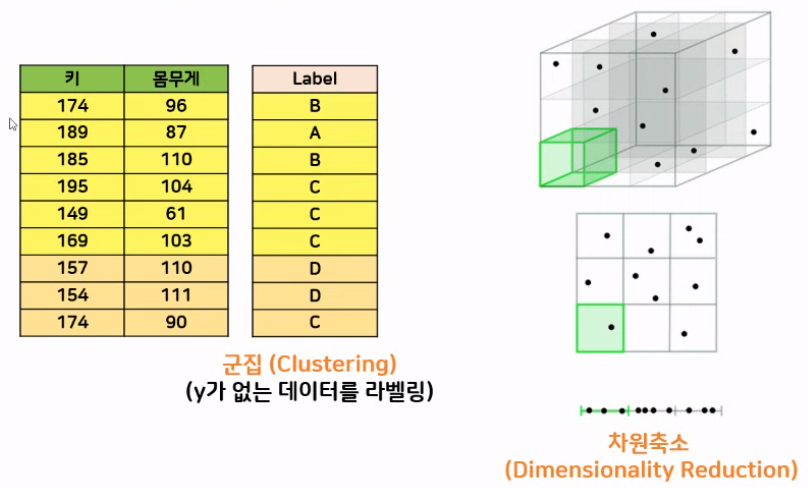
- (중지도 학습) - 확실한 데이터만 라벨을 달아줌
- 강화 학습(Reinforcement Learning) : 지도학습과 비슷하지만 완전한 답(Label)을 제공하지 않는 특징이 있다.
    - 기계는 더 많은 보상을 얻을 수 있는 방향으로 행동을 학습
    - 주로 게임이나 로봇을 학습시키는데, 네비게이션에 많이 사용
    - 지능형 학습 : 실시간으로 처리(1초 안으로 들어와야 하는)해야하는 일에 사용


- 범주형 데이터(categorical data) - 크기를 갖지 않는 데이터 (보통 문자열 데이터)
    - 숫자형 데이터일 경우 크기를 갖지 않도록 같은 등급으로 encoding 시켜줌
    - class가 존재한다.(class로 나눌 수 있다.)
    - 클래스가 적을 수록 정확도가 높음
        - 클래스가 많은 데이터는 그룹으로 묶어 클래스 수를 줄인다.
    - 항상 범주형 데이터를 다룰 때에는 데이터의 수가 비슷해야 한다.
        - 예를 들어 성별이 남성인 데이터만 있을 때에는 여성의 데이터를 분석X
# .
- 수치형 데이터(Numerical data) - 크기를 갖는 숫자 데이터
    - Grouping하여 범주형 데이터로 클래스를 나눠 놓으면 정확도가 더 올라감
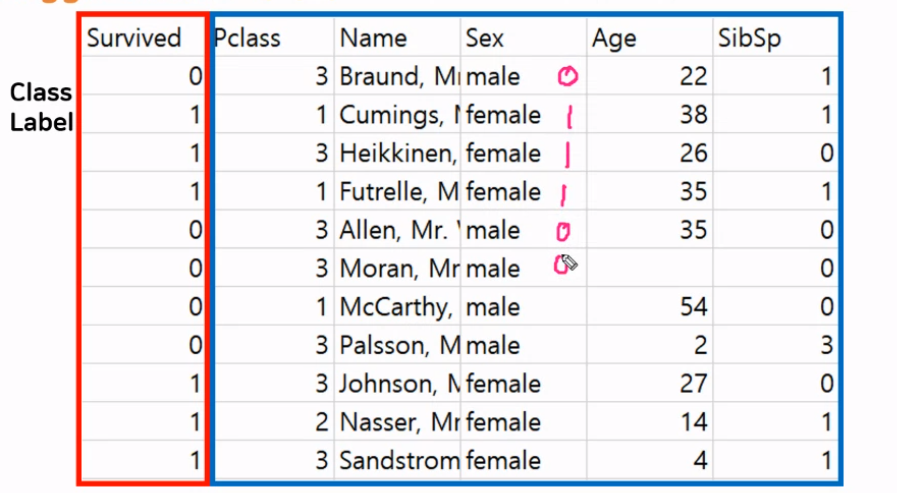

